In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('combined_df.csv')
df.head()

,Country,Country Code,Year,Life Expectancy,HDI,GDI,GreenHouseGas
0,Afghanistan,AFG,2000,55.8,0.352,0.325,16.045420
1,Afghanistan,AFG,2000,55.8,0.352,0.325,14.387895
2,Afghanistan,AFG,2000,55.8,0.352,0.325,17.044710
3,Afghanistan,AFG,2000,55.8,0.352,0.325,17.732318
4,Afghanistan,AFG,2000,55.8,0.352,0.325,17.789451


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58397 entries, 0 to 58396
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          58397 non-null  object 
 1   Country Code     58397 non-null  object 
 2   Year             58397 non-null  int64  
 3   Life Expectancy  58397 non-null  float64
 4   HDI              58397 non-null  float64
 5   GDI              58397 non-null  float64
 6   GreenHouseGas    58397 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.1+ MB


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

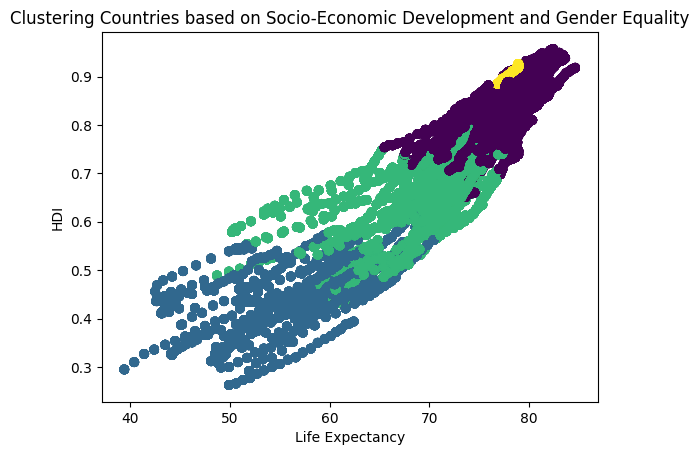

In [6]:
X = df[['Life Expectancy', 'HDI', 'GDI', 'GreenHouseGas']]

# Standardize the features (important for clustering algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (you can experiment with different values)
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the KMeans model
kmeans.fit(X_scaled)

# Add the cluster labels back to the original DataFrame
df['Cluster'] = kmeans.labels_

# Display the DataFrame with clusters
# print(df)

# Visualize the clusters (optional, works best with 2D data)
plt.scatter(df['Life Expectancy'], df['HDI'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Life Expectancy')
plt.ylabel('HDI')
plt.title('Clustering Countries based on Socio-Economic Development and Gender Equality')
plt.show()

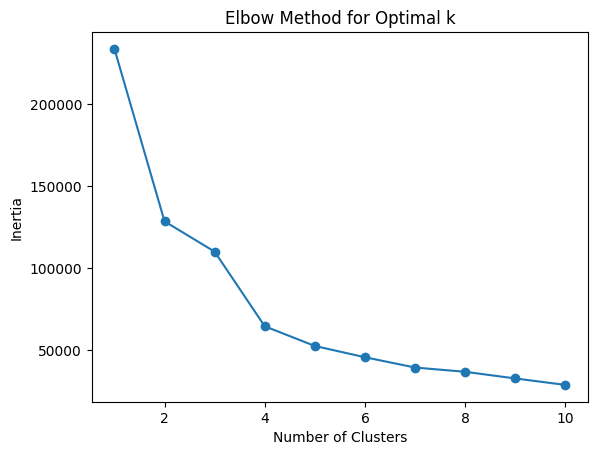

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for different values of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # X_scaled is your standardized feature set
    inertia.append(kmeans.inertia_)

# Plot inertia vs. number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


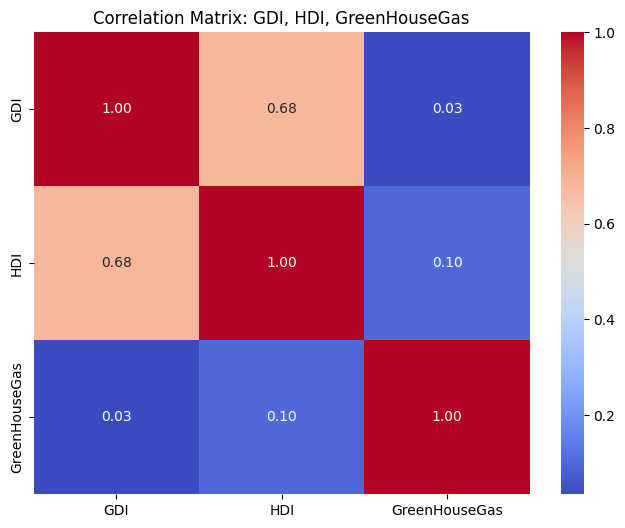

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant features
df_subset = df[['GDI', 'HDI', 'GreenHouseGas']]

# Calculate correlation matrix
corr = df_subset.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: GDI, HDI, GreenHouseGas')
plt.show()

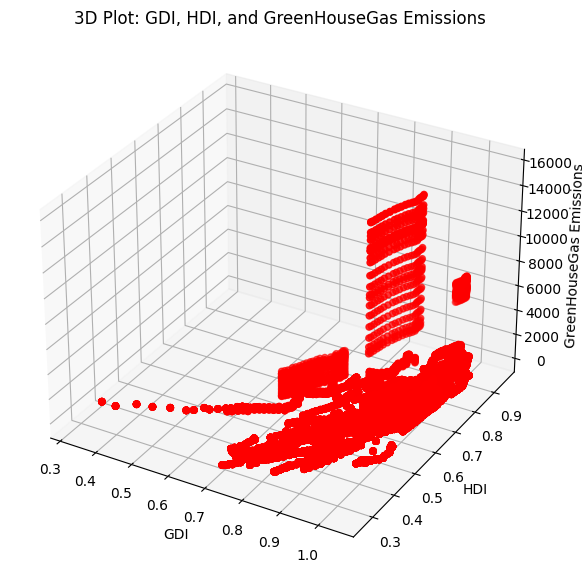

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data points
ax.scatter(df['GDI'], df['HDI'], df['GreenHouseGas'], c='r', marker='o')

# Adding labels
ax.set_xlabel('GDI')
ax.set_ylabel('HDI')
ax.set_zlabel('GreenHouseGas Emissions')

plt.title('3D Plot: GDI, HDI, and GreenHouseGas Emissions')
plt.show()

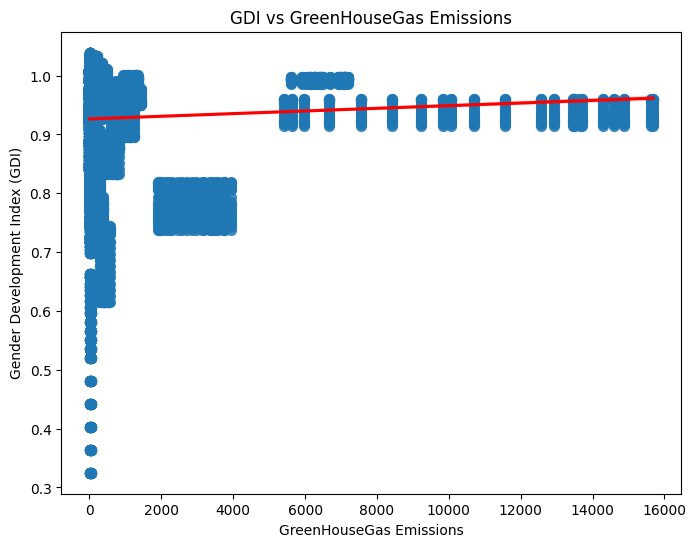

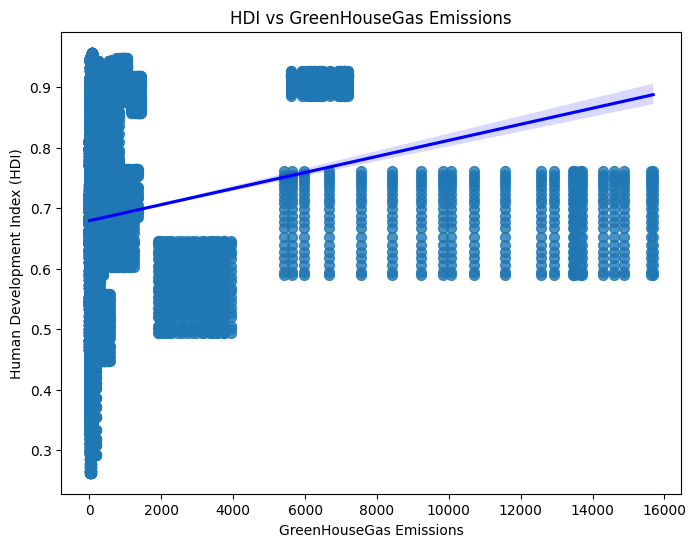

In [11]:
# Scatter plot for GDI vs GreenHouseGas
plt.figure(figsize=(8, 6))
sns.regplot(x='GreenHouseGas', y='GDI', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('GDI vs GreenHouseGas Emissions')
plt.xlabel('GreenHouseGas Emissions')
plt.ylabel('Gender Development Index (GDI)')
plt.show()

# Scatter plot for HDI vs GreenHouseGas
plt.figure(figsize=(8, 6))
sns.regplot(x='GreenHouseGas', y='HDI', data=df, scatter_kws={'s':50}, line_kws={'color':'blue'})
plt.title('HDI vs GreenHouseGas Emissions')
plt.xlabel('GreenHouseGas Emissions')
plt.ylabel('Human Development Index (HDI)')
plt.show()


### Regression Analysis

In [10]:
from sklearn.linear_model import LinearRegression

# Prepare the data
X = df[['GreenHouseGas']]  # Independent variable
y_gdi = df['GDI']          # Dependent variable (GDI)
y_hdi = df['HDI']          # Dependent variable (HDI)

# Regression model for GDI
model_gdi = LinearRegression()
model_gdi.fit(X, y_gdi)
print(f"GDI Regression Coefficient: {model_gdi.coef_[0]}")
print(f"GDI Intercept: {model_gdi.intercept_}")

# Regression model for HDI
model_hdi = LinearRegression()
model_hdi.fit(X, y_hdi)
print(f"HDI Regression Coefficient: {model_hdi.coef_[0]}")
print(f"HDI Intercept: {model_hdi.intercept_}")


GDI Regression Coefficient: 2.255002194067439e-06
GDI Intercept: 0.9264554731286109
HDI Regression Coefficient: 1.3274785062076466e-05
HDI Intercept: 0.6794619859904933


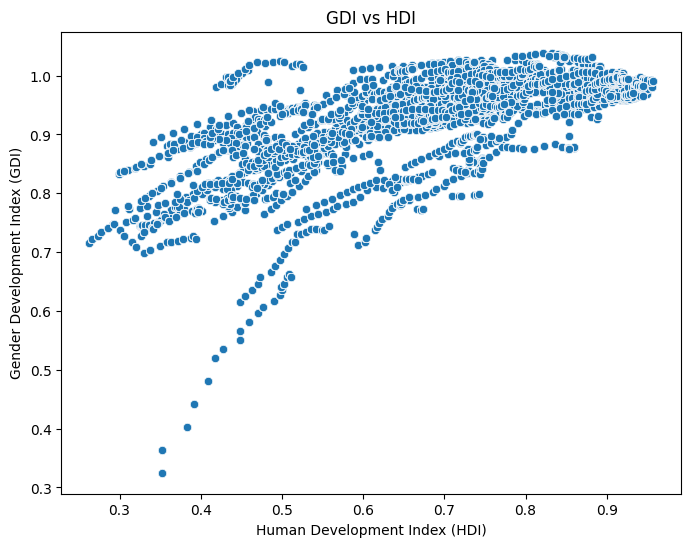

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot between GDI and HDI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='HDI', y='GDI', data=df)

# Add labels and title
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Gender Development Index (GDI)')
plt.title('GDI vs HDI')

# Show the plot
plt.show()


**Higher Development Leads to Better Gender Equality**: Countries with higher human development levels almost always have higher gender development indices. This aligns with the idea that as countries invest in education, healthcare, and economic development, they tend to promote gender equality.

**Variation at Lower Development Levels**: In less developed countries, the relationship between HDI and GDI is more varied, suggesting that factors beyond just development, such as cultural or policy-related aspects, can significantly influence gender equality.

In [13]:
# Create a dictionary mapping countries to regions
country_to_region = {
    'Afghanistan': 'South Asia',
    'Algeria': 'North Africa',
    'Angola': 'Sub-Saharan Africa',
    'Argentina': 'Latin America & Caribbean',
    # Add mappings for all countries...
}

# Assuming your DataFrame is called df and has a 'Country' column
df['Region'] = df['Country'].map(country_to_region)


In [14]:
# Group data by Region and calculate summary statistics
region_stats = df.groupby('Region')[['HDI', 'GDI']].agg(['mean', 'std'])

# Display the summary statistics
print(region_stats)


                                HDI                GDI          
                               mean       std     mean       std
Region                                                          
Latin America & Caribbean  0.818050  0.023154  0.99165  0.002691
North Africa               0.706800  0.034658  0.82330  0.026098
South Asia                 0.452600  0.051605  0.55580  0.100428
Sub-Saharan Africa         0.576833  0.006411  0.88050  0.029817


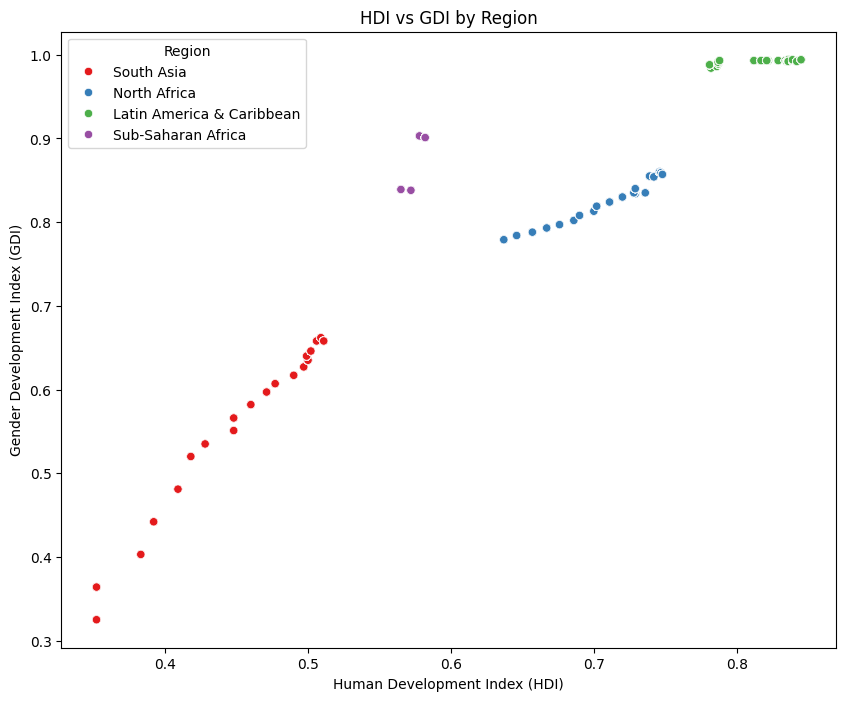

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with regions colored differently
plt.figure(figsize=(10, 8))
sns.scatterplot(x='HDI', y='GDI', hue='Region', data=df, palette='Set1')

# Add labels and title
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Gender Development Index (GDI)')
plt.title('HDI vs GDI by Region')

# Show the plot
plt.show()

South Asia has the lowest HDI, and GDI. While Latin America and the Caribbean has the highest HDI vs GDI

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


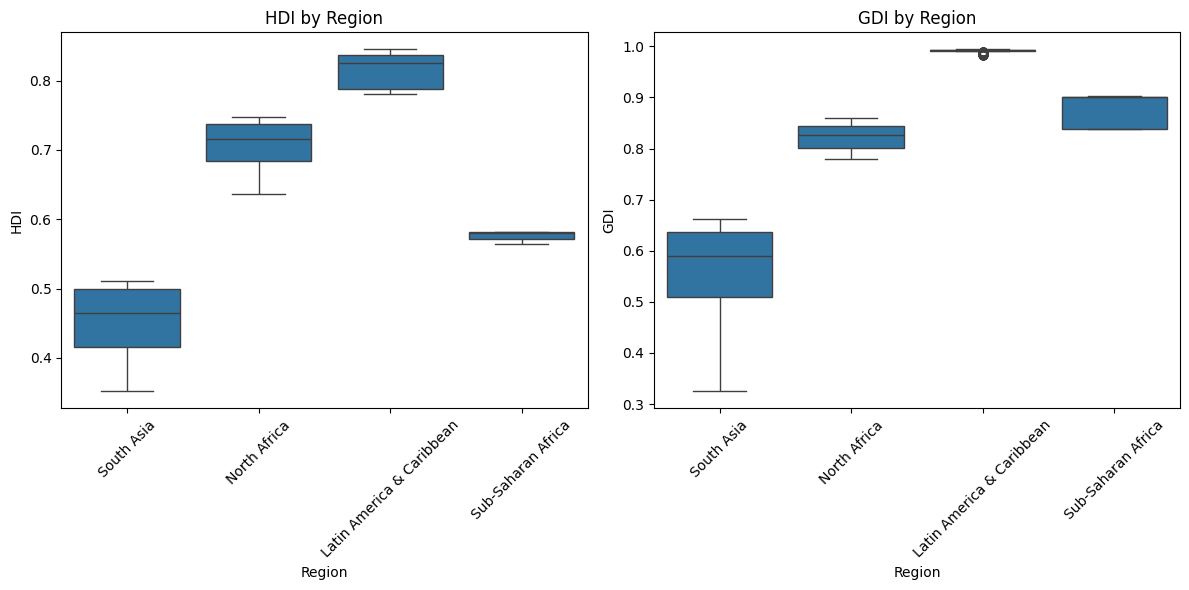

In [16]:
# Create box plots to show the distribution of HDI and GDI by region
plt.figure(figsize=(12, 6))

# Box plot for HDI by region
plt.subplot(1, 2, 1)
sns.boxplot(x='Region', y='HDI', data=df)
plt.xticks(rotation=45)
plt.title('HDI by Region')

# Box plot for GDI by region
plt.subplot(1, 2, 2)
sns.boxplot(x='Region', y='GDI', data=df)
plt.xticks(rotation=45)
plt.title('GDI by Region')

plt.tight_layout()
plt.show()

We can observe that South Asia is still struggling with Human Development. South Asia also shows the largest variability in GDI, with values ranging from 0.3 to 0.7.

## South Asia Analysis



In [18]:
# Filter data for South Asia
south_asia_df = df[df['Region'] == 'South Asia']

# Display the data for verification
south_asia_df.head()


,Country,Country Code,Year,Life Expectancy,HDI,GDI,GreenHouseGas,Cluster,Region
0,Afghanistan,AFG,2000,55.8,0.352,0.325,16.045420,1,South Asia
1,Afghanistan,AFG,2000,55.8,0.352,0.325,14.387895,1,South Asia
2,Afghanistan,AFG,2000,55.8,0.352,0.325,17.044710,1,South Asia
3,Afghanistan,AFG,2000,55.8,0.352,0.325,17.732318,1,South Asia
4,Afghanistan,AFG,2000,55.8,0.352,0.325,17.789451,1,South Asia


In [19]:
# Calculate correlation between GHG emissions and GDI in South Asia
correlation = south_asia_df[['GreenHouseGas', 'GDI']].corr()

# Display the correlation matrix
print(correlation)


               GreenHouseGas           GDI
GreenHouseGas   1.000000e+00 -8.343813e-16
GDI            -8.343813e-16  1.000000e+00


In [20]:
from sklearn.linear_model import LinearRegression

# Prepare the data
X = south_asia_df[['GreenHouseGas']]  # Independent variable: GHG emissions
y = south_asia_df['GDI']  # Dependent variable: Gender Development Index

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficient and intercept
print(f'Coefficient (Effect of GHG on GDI): {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')


Coefficient (Effect of GHG on GDI): 2.0148746964847752e-19
Intercept: 0.5558


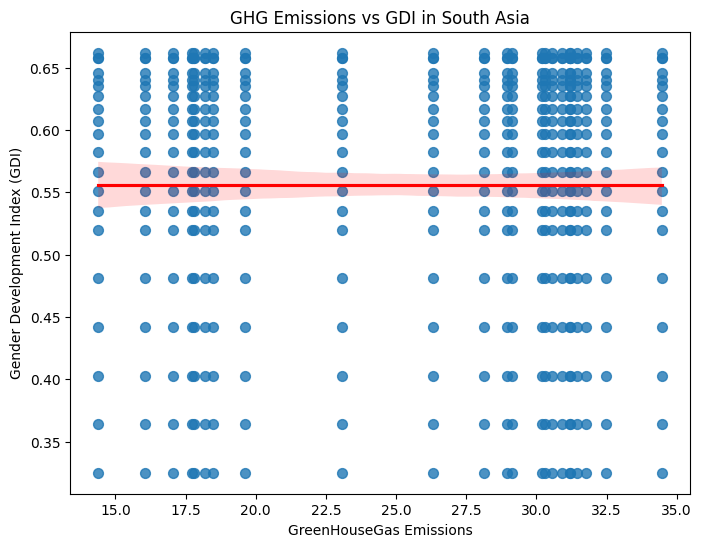

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='GreenHouseGas', y='GDI', data=south_asia_df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('GHG Emissions vs GDI in South Asia')
plt.xlabel('GreenHouseGas Emissions')
plt.ylabel('Gender Development Index (GDI)')
plt.show()